In [15]:
%matplotlib inline
from pylab import *

In [2]:
import plasticnet as pn
import numpy as np
from bigfonts import *

Splikes version  0.1.2
Plasticnet version  0.1.9


In [3]:
def make_gaussian(N=4,sz=100,rates=[0,30],sigma=10,display=False):
    from numpy import r_,concatenate,array,exp
    from pylab import plot
    
    min_rate,max_rate=rates
    
    centers=r_[0:N]*sz//N

    # reverse, so the shift works easier down below
    centers=sz-centers
    
    mid=sz//2
    idx=r_[0:sz]-mid
    
    g=exp(-idx**2/(2.0*sigma**2))*(max_rate-min_rate)+min_rate
    
    g=concatenate((g[mid:],g[0:mid]))
    l=[]
    for c in centers:
        
        r=concatenate((g[c:],g[0:c]))
        l.append(r)
        
    a=array(l,float)
        
    if display:
        
        for r in a:
            plot(r,'.-')
    
    return a


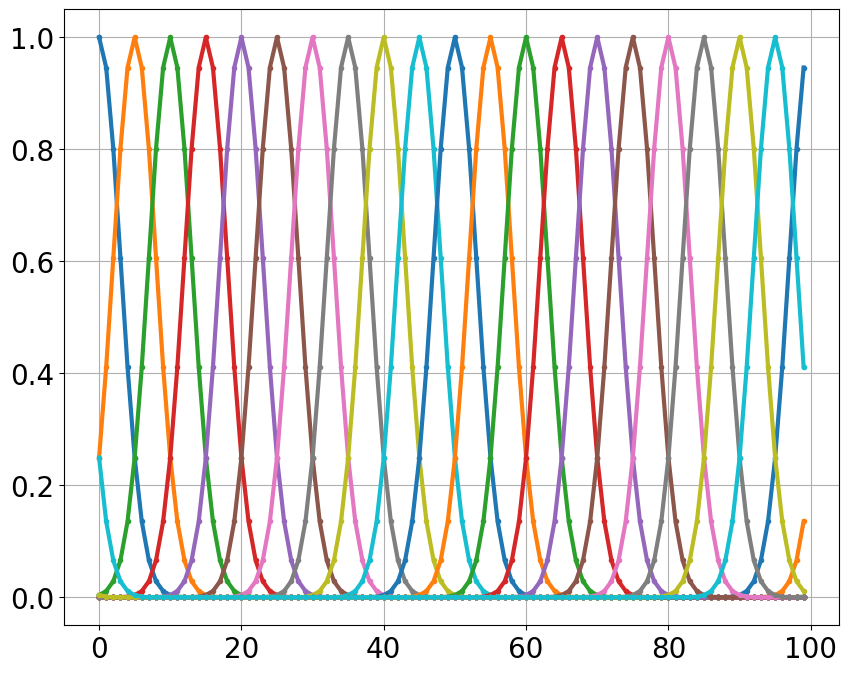

In [83]:
im=make_gaussian(N=20,sz=100,sigma=3,rates=[0,1],display=True)

In [84]:
im.shape

(20, 100)

In [85]:
pre=pn.neurons.pattern_neuron(im)
sim=pn.simulation(50)  # run up to t=50.  with dt=1, this is 50 steps
sim.monitor(pre,['output'],1)  # the "1" here is the time-step for saving.  e.g. if it is dt, then it saves every time step

# run-sim takes a simulation, a list of neurons, and a list of connections
pn.run_sim(sim,[pre],[])


Sim Time Elapsed...0.00 s


In [86]:
t,y=sim.monitors['output'].arrays()

In [87]:
y.shape 

(52, 100)

Text(0, 0.5, 'output')

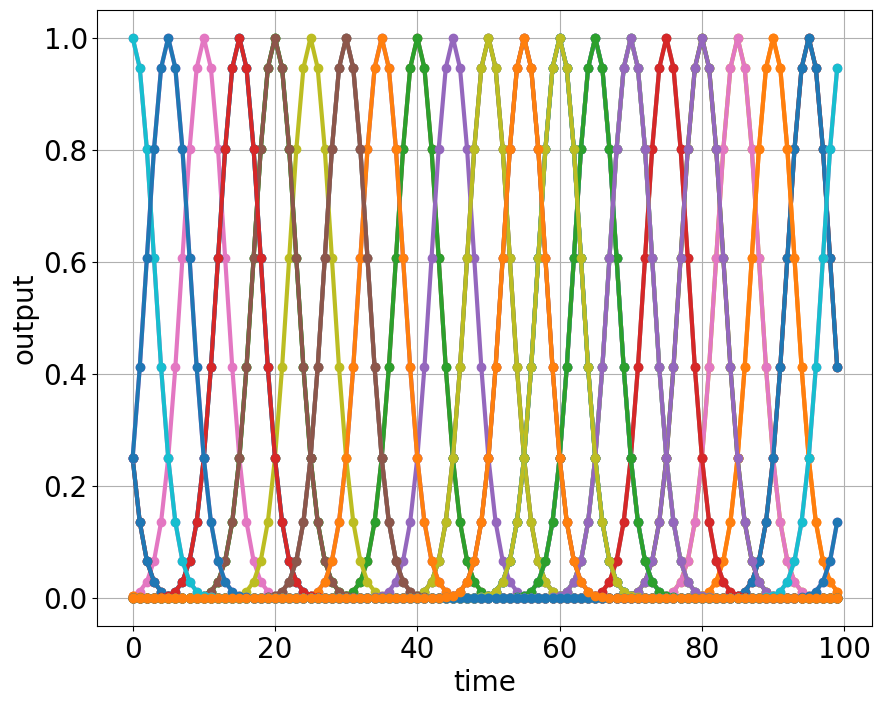

In [88]:
for _y in y:
    plot(_y,'-o')
xlabel('time')
ylabel('output')

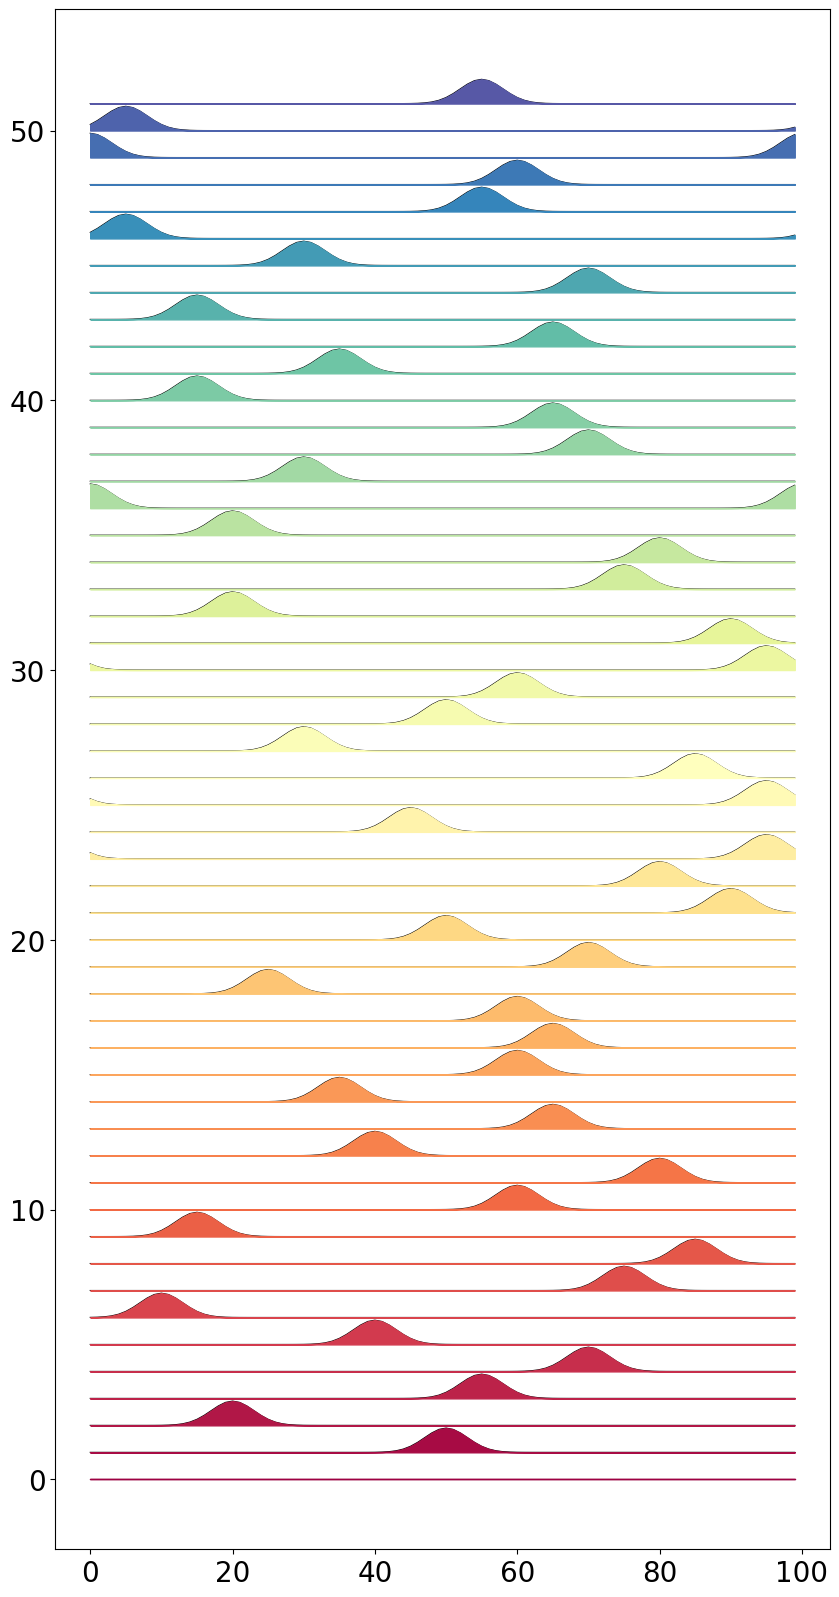

In [89]:
figure(figsize=(10,20))
cmap = mpl.cm.get_cmap("Spectral")

for _t,_y in zip(t,y):
    _x=np.arange(len(_y))
    plot(_x, .9*_y + _t, color="k", linewidth=0.75, zorder=100 - n)
    color = cmap(_t / len(t))
    fill_between(_x, .9*_y + _t, _t, color=color, zorder=100 - _t)
    
gca().grid(False)


In [90]:
post=pn.neurons.linear_neuron(1)

c=pn.connections.BCM(pre,post,[0,.3])  # [0,0.05] is the initial weight range
c.eta=5e-5  # learning rate for BCM
c.tau=1000  # the memory constant for BCM

sim=pn.simulation(1000*100)
sim.monitor(c,['weights','theta'],1000)
sim.monitor(post,['output'],1000)
sim.monitor(pre,['output'],1000)

pn.run_sim(sim,[pre,post],[c])

Sim Time Elapsed...0.10 s


In [91]:
t,weights=sim.monitors['weights'].arrays()
t=t/t.max()

outputs=[]
for w in weights:
    output=[sum(x*w) for x in pre.patterns]
    outputs.append(output)
outputs=array(outputs)

θ=sim.monitors['theta'].array()
y=sim.monitors['output'].array()
X=sim.monitors['output_1'].array()

Text(0, 0.5, 'output')

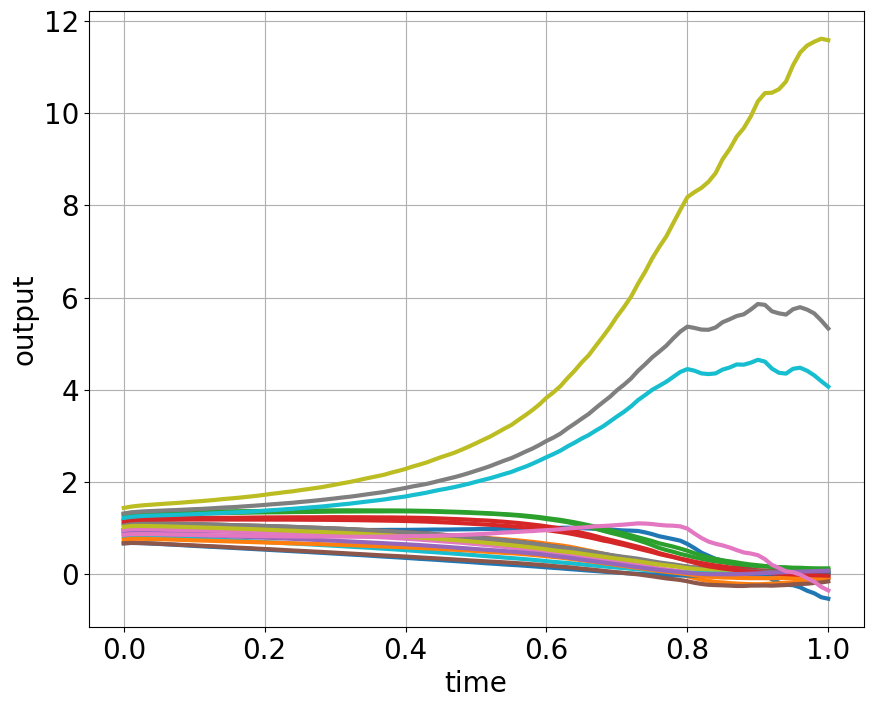

In [92]:
plot(t,outputs)
xlabel('time')
ylabel('output')

In [93]:
weights.shape

(101, 1, 100)

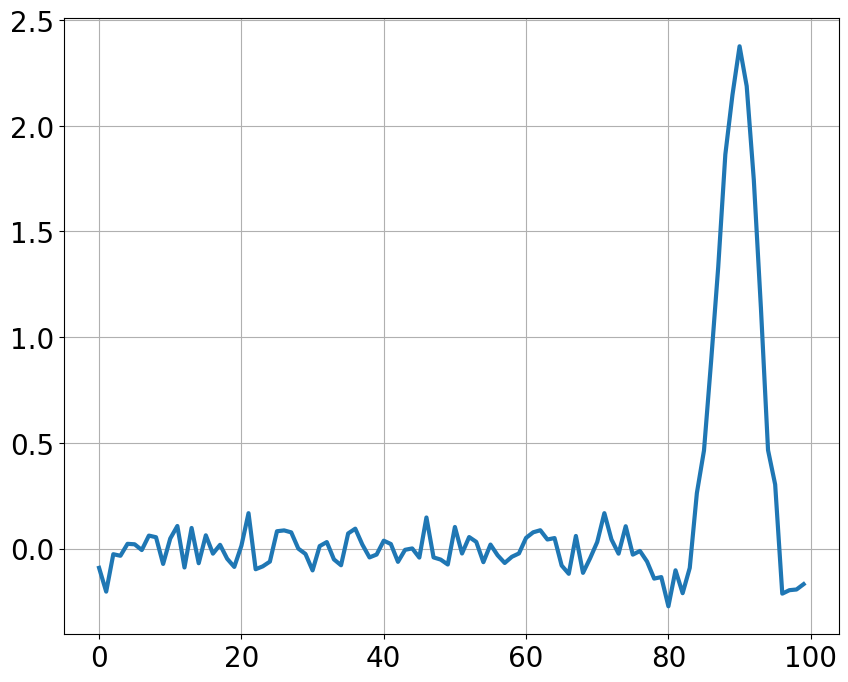

In [94]:
plot(weights[-1,:,:].ravel())

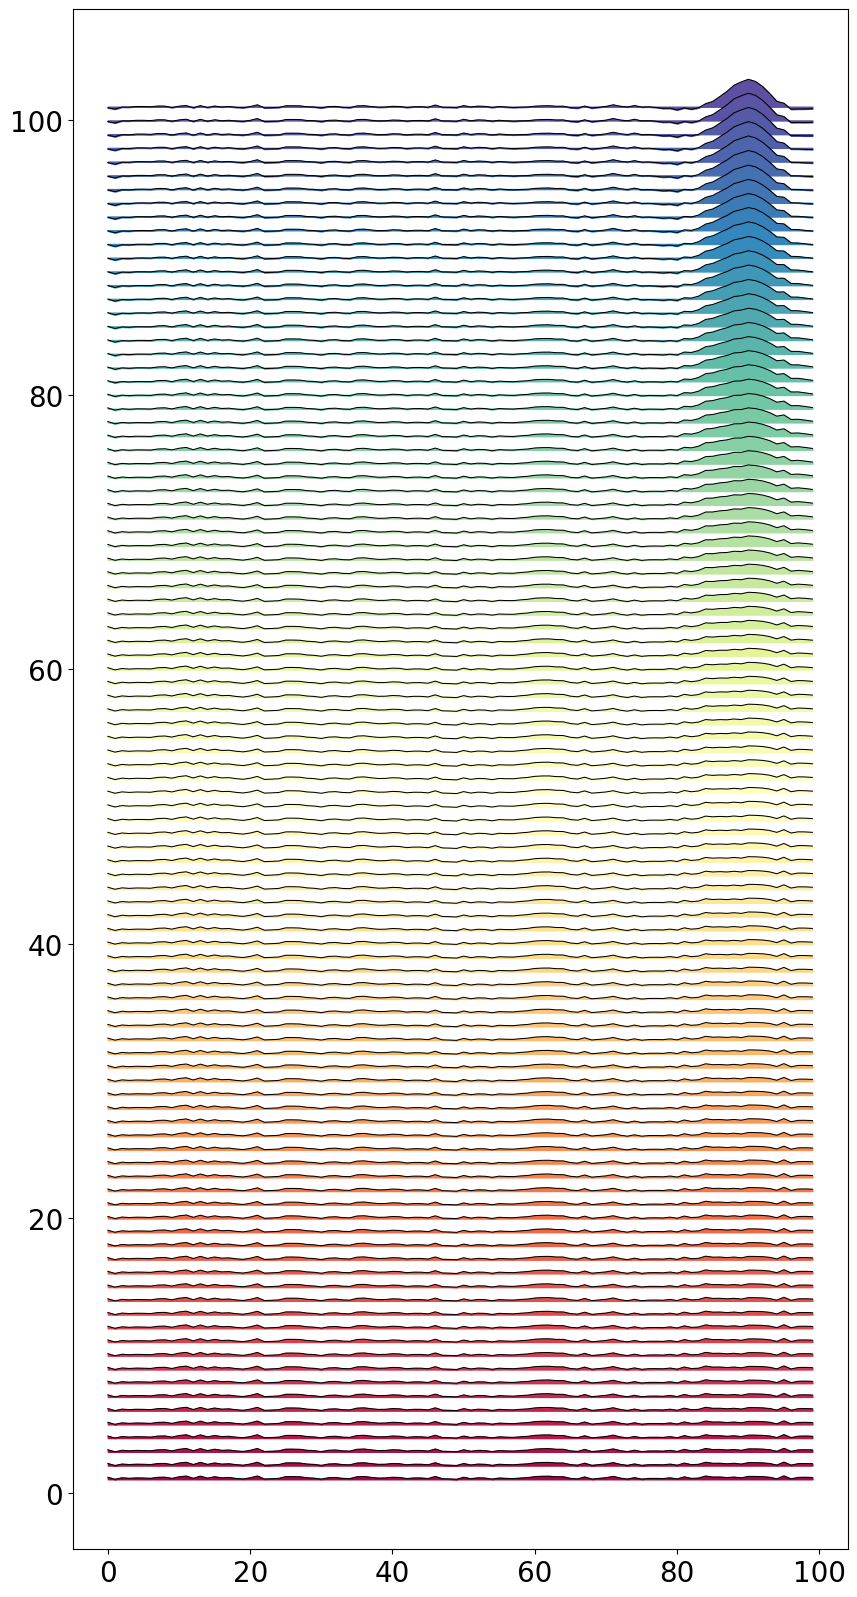

In [95]:
figure(figsize=(10,20))
cmap = mpl.cm.get_cmap("Spectral")

y=weights/weights.max()
scale=2
n=0
for _t,_y in zip(t,y):
    n+=1
    _y=_y.ravel()
    _x=np.arange(len(_y))
    plot(_x, scale*_y + n, color="k", linewidth=0.75, zorder=1000 - n)
    color = cmap(n / len(t))
    fill_between(_x, scale*_y + n, n, color=color, zorder=100 - n)
    
gca().grid(False)


## all positive weights

Sim Time Elapsed...0.31 s


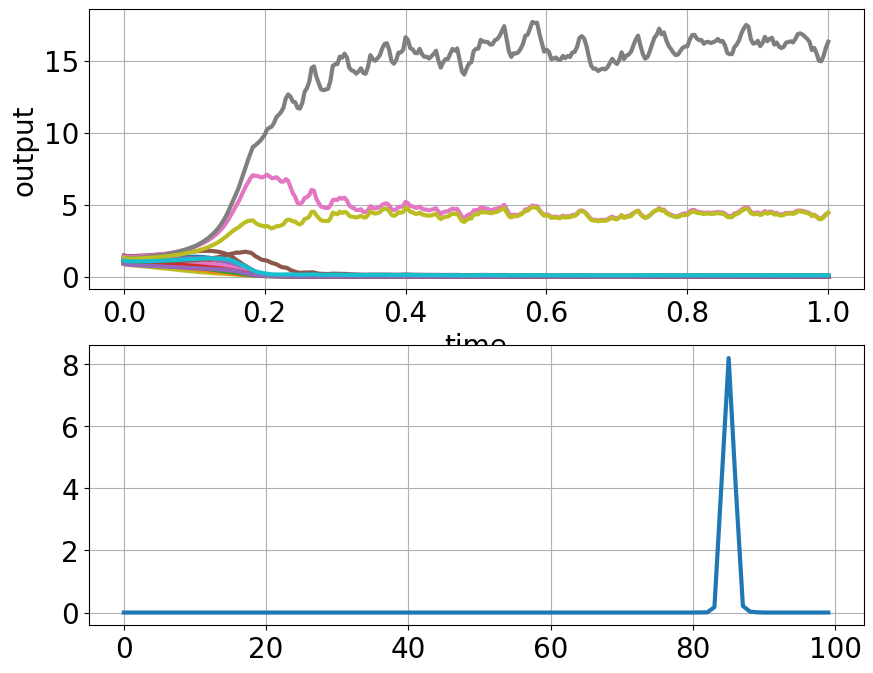

In [100]:
post=pn.neurons.linear_neuron(1)

c=pn.connections.BCM(pre,post,[0,.3],[0,3])  # [0,0.05] is the initial weight range
c.eta=1e-4  # learning rate for BCM
c.tau=1000  # the memory constant for BCM

c+=pn.connections.process.weight_limits(0,np.inf)

sim=pn.simulation(1000*300)
sim.monitor(c,['weights','theta'],1000)
sim.monitor(post,['output'],1000)
sim.monitor(pre,['output'],1000)

pn.run_sim(sim,[pre,post],[c])


t,weights=sim.monitors['weights'].arrays()
t=t/t.max()

outputs=[]
for w in weights:
    output=[sum(x*w) for x in pre.patterns]
    outputs.append(output)
outputs=array(outputs)

θ=sim.monitors['theta'].array()
y=sim.monitors['output'].array()
X=sim.monitors['output_1'].array()

subplot(2,1,1)
plot(t,outputs)
xlabel('time')
ylabel('output')

subplot(2,1,2)
plot(weights[-1,:,:].ravel())

## try weight dependent

Sim Time Elapsed...0.50 s


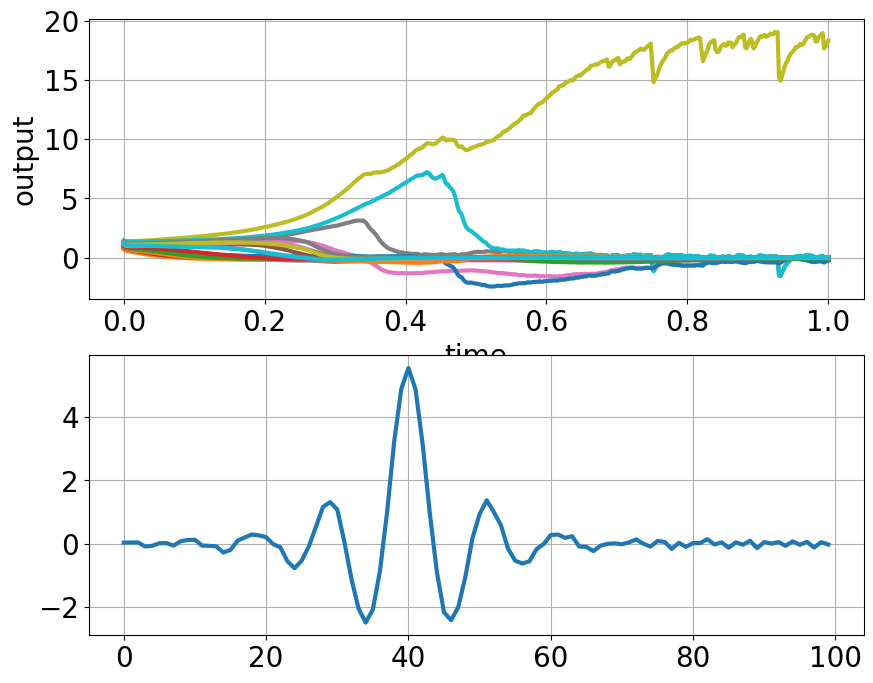

In [110]:
post=pn.neurons.linear_neuron(1)

c=pn.connections.BCM_vonRossum2022(pre,post,[0,.3],[0,3])  # [0,0.05] is the initial weight range
c.eta=2e-5  # learning rate for BCM
c.tau=1000  # the memory constant for BCM
c.u=10

#c+=pn.connections.process.weight_limits(-c.u,np.inf)

sim=pn.simulation(1000*500)
sim.monitor(c,['weights','theta'],1000)
sim.monitor(post,['output'],1000)
sim.monitor(pre,['output'],1000)

pn.run_sim(sim,[pre,post],[c])


t,weights=sim.monitors['weights'].arrays()
t=t/t.max()

outputs=[]
for w in weights:
    output=[sum(x*w) for x in pre.patterns]
    outputs.append(output)
outputs=array(outputs)

θ=sim.monitors['theta'].array()
y=sim.monitors['output'].array()
X=sim.monitors['output_1'].array()

subplot(2,1,1)
plot(t,outputs)
xlabel('time')
ylabel('output')

subplot(2,1,2)
plot(weights[-1,:,:].ravel())